In [16]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm


## the runge-kutta algorithm

first of all, we copied the functions given on moodle for the basic 4-step runge-kutta Algorithm


In [ ]:
import numpy as np

def rk4_step(y0, x0, f, h, f_args = {}):
    ''' Simple python implementation for one RK4 step. 
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            f_args - Dictionary of additional arguments to be passed to the function f
        Output:
            yp1 - M x 1 numpy array of variables at time step x0 + h
            xp1 - time step x0+h
    '''
    k1 = h * f(y0, x0, **f_args)
    k2 = h * f(y0 + k1/2., x0 + h/2., **f_args)
    k3 = h * f(y0 + k2/2., x0 + h/2., **f_args)
    k4 = h * f(y0 + k3, x0 + h, **f_args)
    
    xp1 = x0 + h
    yp1 = y0 + 1./6.*(k1 + 2.*k2 + 2.*k3 + k4)
    
    return(yp1,xp1)

def rk4(y0, x0, f, h, n, f_args = {}):
    ''' Simple implementation of RK4
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            n      - number of steps
            f_args - Dictionary of additional arguments to be passed to the function f
        Output:
            yn - N+1 x M numpy array with the results of the integration for every time step (includes y0)
            xn - N+1 x 1 numpy array with the time step value (includes start x0)
    '''
    yn = np.zeros((n+1, y0.shape[0]))
    xn = np.zeros(n+1)
    yn[0,:] = y0
    xn[0] = x0
    
    for n in np.arange(1,n+1,1):
        yn[n,:], xn[n] = rk4_step(y0 = yn[n-1,:], x0 = xn[n-1], f = f, h = h, f_args = f_args)
        
    return(yn, xn)

# Be advised that the integration can take a while for large values of n (e.g >=10^5).

###### def rk4_step(f,h,y0,x0):
    ''' Simple python implementation for one RK4 step. 
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            f_args - Dictionary of additional arguments to be passed to the function f
        Output:
            yp1 - M x 1 numpy array of variables at time step x0 + h
            xp1 - time step x0+h
    '''
    k1 = h * f(y0, x0)
    k2 = h * f(y0 + k1/2., x0 + h/2.)
    k3 = h * f(y0 + k2/2., x0 + h/2.)
    k4 = h * f(y0 + k3, x0 + h)
    
    xp1 = x0 + h
    yp1 = y0 + 1./6.*(k1 + 2.*k2 + 2.*k3 + k4)
    
    return(yp1,xp1)


then we addded the missing functions to calculate the 3body problem, the second order differentail equation is turned into a larger set of 1st order differential equations


In [17]:


#Functions for Coordinates of the 1st body
def f_1x(x1, x2, x3, y1, y2, y3):
    return G*m2*(x2-x1)/(np.sqrt((x2-x1)**2+(y2-y1)**2))**3 + G*m3*(x3-x1)/(np.sqrt((x3-x1)**2+(y3-y1)**2))**3 
def f_1y(x1, x2, x3, y1, y2, y3):
    return G*m2*(y2-y1)/(np.sqrt((x2-x1)**2+(y2-y1)**2))**3 + G*m3*(y3-y1)/(np.sqrt((x3-x1)**2+(y3-y1)**2))**3 

#Functions for Coordinates of the 2snd body
def f_2x(x1, x2, x3, y1, y2, y3):
    return G*m1*(x1-x2)/(np.sqrt((x1-x2)**2+(y1-y2)**2))**3  + G*m3*(x3-x2)/(np.sqrt((x3-x2)**2+(y3-y2)**2))**3 
def f_2y(x1, x2, x3, y1, y2, y3):
    return G*m1*(y1-y2)/(np.sqrt((x1-x2)**2+(y1-y2)**2))**3  + G*m3*(y3-y2)/(np.sqrt((x3-x2)**2+(y3-y2)**2))**3 

#Functions for Coordinates of the 3rd body
def f_3x(x1, x2, x3, y1, y2, y3):
    return G*m2*(x2-x3)/(np.sqrt((x2-x3)**2+(y2-y3)**2))**3  + G*m1*(x1-x3)/(np.sqrt((x1-x3)**2+(y1-y3)**2))**3 
def f_3y(x1, x2, x3, y1, y2, y3):
    return G*m2*(y2-y3)/(np.sqrt((x2-x3)**2+(y2-y3)**2))**3  + G*m1*(y1-y3)/(np.sqrt((x1-x3)**2+(y1-y3)**2))**3 


#Function for the Runge-Kutta calculation
#Calculates the acceleration and shifts the velocity to the position index in the pos_vel array
def f_1(pos_vel, x0):
    a_x1 = f_1x(pos_vel[0], pos_vel[2], pos_vel[4], pos_vel[6], pos_vel[8], pos_vel[10])
    a_x2 = f_2x(pos_vel[0], pos_vel[2], pos_vel[4], pos_vel[6], pos_vel[8], pos_vel[10])
    a_x3 = f_3x(pos_vel[0], pos_vel[2], pos_vel[4], pos_vel[6], pos_vel[8], pos_vel[10])
    a_y1 = f_1y(pos_vel[0], pos_vel[2], pos_vel[4], pos_vel[6], pos_vel[8], pos_vel[10])
    a_y2 = f_2y(pos_vel[0], pos_vel[2], pos_vel[4], pos_vel[6], pos_vel[8], pos_vel[10])
    a_y3 = f_3y(pos_vel[0], pos_vel[2], pos_vel[4], pos_vel[6], pos_vel[8], pos_vel[10])
    vel_acc_step = np.array([pos_vel[1], a_x1, pos_vel[3], a_x2, pos_vel[5], a_x3, pos_vel[7], a_y1,pos_vel[9], a_y2,pos_vel[11], a_y3])
    return vel_acc_step



In [19]:
#function integrates the trajectories of the three bodies from starting time xo till end time x_max,
#by calling upon the previously discussed functions.
#returns x and y positions of all three bodies for every timestep in lists
def calc(x_max, x0, pos_vel):
    while x0 < x_max:
        POS_VEL.append(pos_vel)
        X0.append(x0)
        pos_vel, x0 = rk4_step(np.array(pos_vel), x0, f_1, h)
    #Turns pos_vel array into 1D arrays for individual x and y coordinates
    x1list = []
    x2list = [] 
    x3list = [] 
    y1list = [] 
    y2list = []
    y3list = [] 
    for i in POS_VEL:
        x1list.append(i[0])
        x2list.append(i[2])
        x3list.append(i[4])
        y1list.append(i[6])
        y2list.append(i[8])
        y3list.append(i[10])
    return x1list, y1list, x2list, y2list, x3list, y3list


## Part A
first, the trajectories of the three bodies are calculated, using the masses and starting positions and velocities as specified in the homeworksheet. 

In [20]:
#Start and end of calculation
x0 = 0
x_max = 6.4

#Stepsize
h = 0.01
#Masses of bodies
m1 = 1
m2 = 1
m3 = 1
#Gravitational constant
G = 1

#Starting positions and velocities
x1,  y1 = -0.97000436,  0.24308753
vx1, vy1 = -0.46620368, -0.43236573

x2,  y2 =  0.97000436, -0.24308753
vx2, vy2 = -0.46620368, -0.43236573

x3,  y3 = 0.0,        0.0
vx3, vy3 = 0.93240737, 0.86473146

#Holds all calculated positions and velocities 
POS_VEL = []
#Holds all timesteps
X0 = []
#One array to combine all positions and velocities of the three bodies
pos_vel=np.array([x1,vx1,x2,vx2,x3,vx3,y1,vy1,y2,vy2,y3,vy3])


#calculate
x1list, y1list, x2list, y2list, x3list, y3list = calc(x_max, x0, pos_vel)



Then the Trajectories of each of the three masses are plotted on their own, as well as in the same diagram(plot 4)

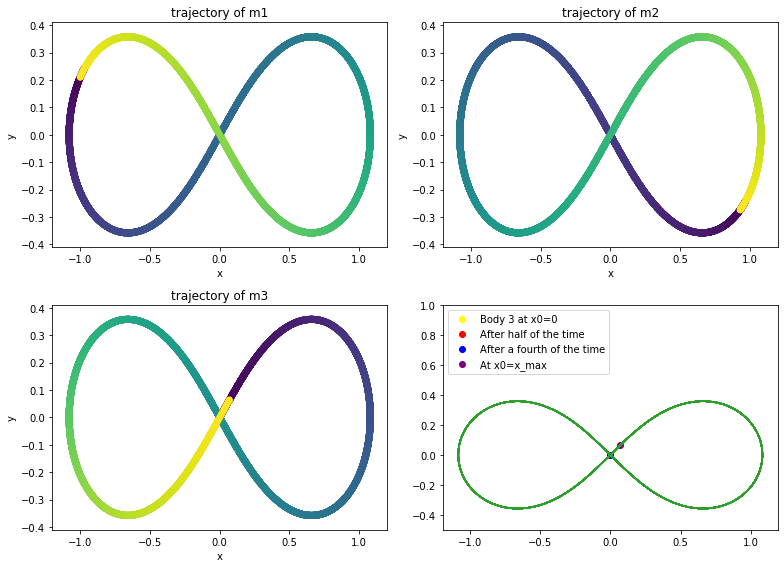

In [32]:



#plot
fig = plt.figure(figsize=(11,8))

#Plot body 1
ax1=plt.subplot(2,2,1)
ax1.set_title("trajectory of m1")
ax1.set_ylabel("y")
ax1.set_xlabel("x")
ax1.scatter(x1list, y1list, c=X0)

#PLot body 2
ax2=plt.subplot(2,2,2)
ax2.set_title("trajectory of m2")
ax2.set_ylabel("y")
ax2.set_xlabel("x")
ax2.scatter(x2list, y2list, c=X0)

#PLot body 3
ax3=plt.subplot(2,2,3)
ax3.set_title("trajectory of m3")
ax3.set_ylabel("y")
ax3.set_xlabel("x")
ax3.scatter(x3list, y3list, c=X0)

ax4=plt.subplot(2,2,4)
ax4.plot(x1list, y1list)
ax4.plot(x2list, y2list)
ax4.plot(x3list, y3list)
ax4.set_ylim(-0.5, 1)
ax4.scatter(x3, y3, c="yellow", label="Body 3 at x0=0")
ax4.scatter(x3list[int(len(x3list)/2)], y3list[int(len(x3list)/2)], c="red", label="After half of the time")
ax4.scatter(x3list[int(len(x3list)/4)], y3list[int(len(x1list)/4)], c="blue", label="After a fourth of the time")
ax4.scatter(x3list[-1], y3list[-1], c="purple", label="At x0=x_max")
ax4.legend(loc='upper left')
plt.tight_layout()

The following animation shows the masses on their trajectories blabla description

In [ ]:
Video("Anim_plot.mp4")


## Part B
Now we want to take a closer look at the effect of the stepsize on the calculations. For this, we first calculate the trajectories using four different Stepsizes h , ranging from 0.1 to 0.0001. the starting coordinates of the masses were derived from the instructions on the homeworksheet using simple trigonometry.

In [43]:
#Start and end of calculation
x0 = 0
x_max = 5


#Masses of bodies
m1 = 3.
m2 = 4.
m3 = 5.
#Gravitational constant
G = 1

#Starting positions and velocities
x1,  y1  =  4.0, -3.0
vx1, vy1 =  0.0,  0.0

x2,  y2  =  0.0,   0.0
vx2, vy2 =  0.0,   0.0

x3,  y3  =  0.0,  -3.0
vx3, vy3 =  0.0,   0.0

#Holds all calculated positions and velocities 
POS_VEL = []
#Holds all timesteps
X0 = []
#One array to combine all positions and velocities of the three bodies
pos_vel=np.array([x1,vx1,x2,vx2,x3,vx3,y1,vy1,y2,vy2,y3,vy3])


M = m1+m2+m3
h=0.1
#Holds all calculated positions and velocities 
POS_VEL = []
#Holds all timesteps
X0 = []
Ax1list, Ay1list, Ax2list, Ay2list, Ax3list, Ay3list = calc(x_max, x0, pos_vel)


h=0.01
#Holds all calculated positions and velocities 
POS_VEL = []
#Holds all timesteps
X0 = []
Bx1list, By1list, Bx2list, By2list, Bx3list, By3list = calc(x_max, x0, pos_vel)


h=0.001
#Holds all calculated positions and velocities 
POS_VEL = []
#Holds all timesteps
X0 = []
Cx1list, Cy1list, Cx2list, Cy2list, Cx3list, Cy3list = calc(x_max, x0, pos_vel)

h=0.0001
#Holds all calculated positions and velocities 
POS_VEL = []
#Holds all timesteps
X0 = []
Dx1list, Dy1list, Dx2list, Dy2list, Dx3list, Dy3list = calc(x_max, x0, pos_vel)

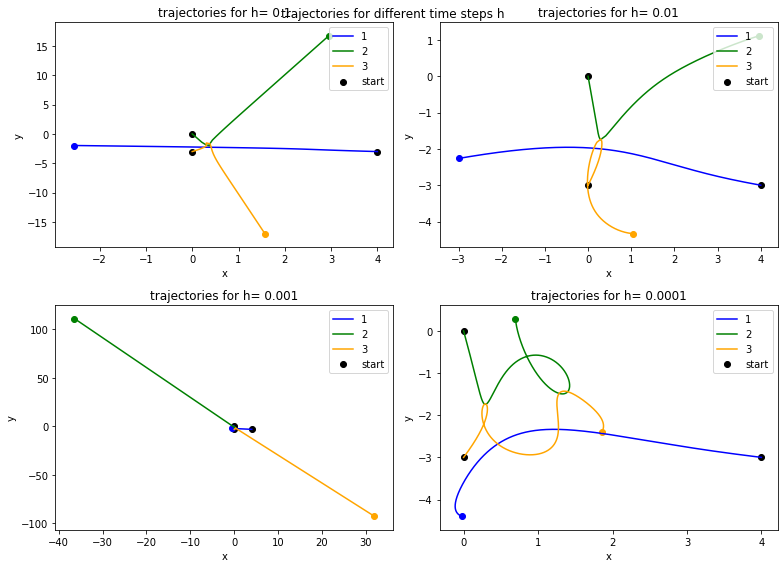

In [56]:
#x_center_of_mass = np.array((m1*np.array(x1list))+(m2*np.array(x2list))+(m3*np.array(x3list)))*1/M
#y_center_of_mass = np.array((m1*np.array(y1list))+(m2*np.array(y2list))+(m3*np.array(y3list)))*1/M
#np.array(x1list)[0]

def draw_trajectories(ax,Ax1list, Ay1list, Ax2list, Ay2list, Ax3list, Ay3list):
    ax.scatter(x1, y1, color="black", label="start")
    #plt.scatter(x_center_of_mass, y_center_of_mass, color="purple", label="Center of mass")
    ax.scatter(x2, y2, color="black")
    ax.scatter(x3, y3, color="black")
    ax.plot(Ax1list, Ay1list, color="blue", label="1")
    ax.plot(Ax2list, Ay2list, color="green", label="2")
    ax.plot(Ax3list, Ay3list, color="orange", label="3")
    ax.scatter(Ax1list[-1], Ay1list[-1], color="blue")
    ax.scatter(Ax2list[-1], Ay2list[-1], color="green")
    ax.scatter(Ax3list[-1], Ay3list[-1], color="orange")
    ax.legend(loc= "upper right")
    return


fig=plt.figure(figsize=(11,8),tight_layout="true")
fig.suptitle("trajectories for different time steps h")
#Plot trajectories for h=0.1
ax1=plt.subplot(2,2,1)
ax1.set_title("trajectories for h= 0.1")
ax1.set_ylabel("y")
ax1.set_xlabel("x")
draw_trajectories(ax1,Ax1list, Ay1list, Ax2list, Ay2list, Ax3list, Ay3list)


#PLot body 2
ax2=plt.subplot(2,2,2)
ax2.set_title("trajectories for h= 0.01")
ax2.set_ylabel("y")
ax2.set_xlabel("x")
draw_trajectories(ax2,Bx1list, By1list, Bx2list, By2list, Bx3list, By3list)


#PLot for h=0.001
ax3=plt.subplot(2,2,3)

ax3.set_title("trajectories for h= 0.001")
ax3.set_ylabel("y")
ax3.set_xlabel("x")
draw_trajectories(ax3,Cx1list, Cy1list, Cx2list, Cy2list, Cx3list, Cy3list)


ax4=plt.subplot(2,2,4)
ax4.set_title("trajectories for h= 0.0001")
ax4.set_ylabel("y")
ax4.set_xlabel("x")
draw_trajectories(ax4,Dx1list, Dy1list, Dx2list, Dy2list, Dx3list, Dy3list)


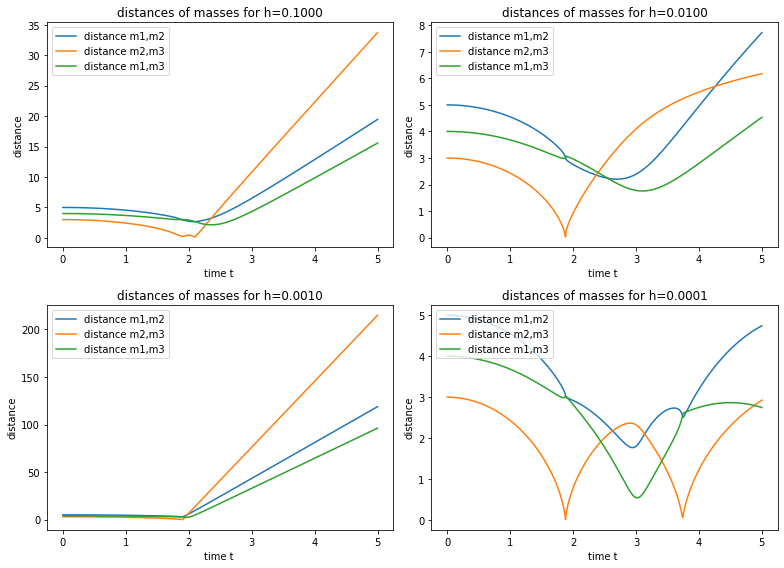

In [68]:
#function calcuates distance between two masses at one point in time and returns that value
def dist(x1,y1,x2,y2):
    return np.sqrt((x2-x1)**2+(y2-y1)**2)

#function calculates distance between all masspoints over time and returns three lists containing
#all the distances
def calc_distances(x1list,y1list,x2list,y2list,x3list,y3list):
    dist12=[]
    dist23=[]
    dist13=[]
    for i in range(0,len(x1list),1):
        dist12.append(dist(x1list[i],y1list[i],x2list[i],y2list[i]))
        dist13.append(dist(x1list[i],y1list[i],x3list[i],y3list[i]))
        dist23.append(dist(x2list[i],y2list[i],x3list[i],y3list[i]))
    return dist12,dist23,dist13


def draw_distances(ax,h,t,dist12,dist23,dist13):
    ax.set_title("distances of masses for h=%.4f"%(h))
    ax.set_xlabel("time t ")
    ax.set_ylabel("distance")
    ax.plot(t,dist12,label="distance m1,m2")
    ax.plot(t,dist23,label="distance m2,m3")
    ax.plot(t,dist13,label="distance m1,m3")
    ax.legend(loc="upper left")
    return



tA=np.linspace(0,x_max,round(x_max/0.1)+1)
tB=np.linspace(0,x_max,round(x_max/0.01)+1)
tC=np.linspace(0,x_max,round(x_max/0.001))
tD=np.linspace(0,x_max,round(x_max/0.0001))

Adist12,Adist23,Adist13=calc_distances(Ax1list,Ay1list,Ax2list,Ay2list,Ax3list,Ay3list)
Bdist12,Bdist23,Bdist13=calc_distances(Bx1list,By1list,Bx2list,By2list,Bx3list,By3list)
Cdist12,Cdist23,Cdist13=calc_distances(Cx1list,Cy1list,Cx2list,Cy2list,Cx3list,Cy3list)
Ddist12,Ddist23,Ddist13=calc_distances(Dx1list,Dy1list,Dx2list,Dy2list,Dx3list,Dy3list)


fig=plt.figure(figsize=(11,8))
#Plot trajectories for h=0.1
ax1=plt.subplot(2,2,1)
draw_distances(ax1,0.1,tA,Adist12,Adist23,Adist13)

#PLot body 2
ax2=plt.subplot(2,2,2)
draw_distances(ax2,0.01,tB,Bdist12,Bdist23,Bdist13)
#PLot for h=0.001
ax3=plt.subplot(2,2,3)
draw_distances(ax3,0.001,tC,Cdist12,Cdist23,Cdist13)
ax4=plt.subplot(2,2,4)
draw_distances(ax4,0.0001,tD,Ddist12,Ddist23,Ddist13)
plt.tight_layout()



In [ ]:
#test für mehr h

In [ ]:
Video("PLot_chaotic.1.mp4")